<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-Python/blob/Master/LR_inside.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/numpy-regressao/Aula1/dataset.csv', sep=';')

In [4]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [5]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


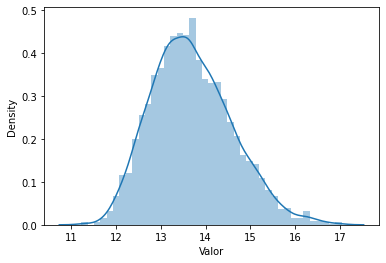

In [6]:
sns.distplot(valor)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


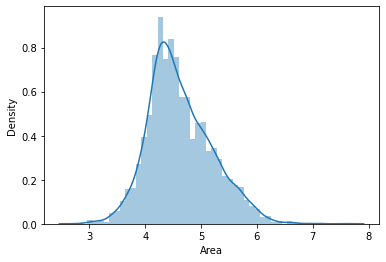

In [7]:
sns.distplot(area)

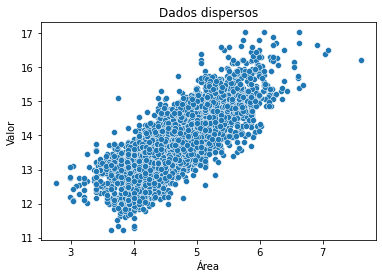

In [8]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

In [9]:
def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0 

In [10]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

In [11]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

In [12]:
def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

In [13]:
theta1, theta0 = minimos_quadrados(area, valor)

In [14]:
print(theta1)
print(theta0)

1.273136797389059
7.806465474455767


In [15]:
soma_erro_quadratico_medio(prever(theta0, theta1, area), valor)

0.2922746317391325

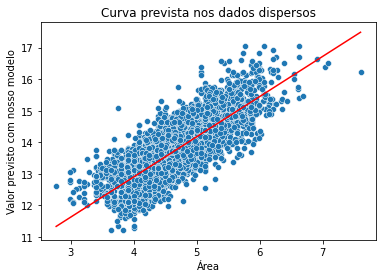

In [16]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

In [17]:
def r_2(y_previsto, y):
    
    variancia_prevista = sum([(y[i] - y_previsto[i]) ** 2 for i in range(len(y))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(y))])
    
    return 1 - variancia_prevista / variancia_original

In [18]:
r_2(prever(theta0, theta1, area), valor)

0.641975652487156

In [19]:
np.exp(prever(theta0, theta1, np.log(72)))

568778.569868878

## Gradient Cost Function

In [20]:
def derivada(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    
    for x_i, y_i in zip(X, y):
        dtheta0 += prever(theta0, theta1, x_i) - y_i
        dtheta1 += (prever(theta0, theta1, x_i) - y_i)*x_i

    dtheta0 /= 0.5*len(X)
    dtheta1 /= 0.5*len(X)

    return dtheta0, dtheta1

In [21]:
def derivada(theta0, theta1, X, y):

    dtheta0 = 2*np.array([prever(theta0, theta1, x_i) - y_i for x_i, y_i in zip(X, y)]).mean()
    dtheta1 = 2*np.array([(prever(theta0, theta1, x_i) - y_i)*x_i for x_i, y_i in zip(X, y)]).mean()

    return dtheta0, dtheta1

In [22]:
def gradienteDescendente(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivada(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [23]:
theta0 = random.random()
theta1 = random.random()
    
for i in range(10000):
    if i % 1000 == 0:
        print(soma_erro_quadratico_medio(prever(theta0, theta1,area), valor))
    theta0, theta1 = gradienteDescendente(theta0, theta1, area, valor, 0.01)

168.22116350027565
0.6593029559163834
0.49986004915533633
0.4096816618926126
0.3586781917821899
0.3298314354554666
0.31351616614591205
0.30428850776975325
0.2990694900819959
0.29611769619076367


In [24]:
print(theta0)
print(theta1)

7.424430958943951
1.3545668505867476


In [25]:
r_2(prever(theta0, theta1, area), valor)

0.6393131110901082

In [26]:
np.exp(prever(theta0, theta1, np.log(72)))

549883.1690804189

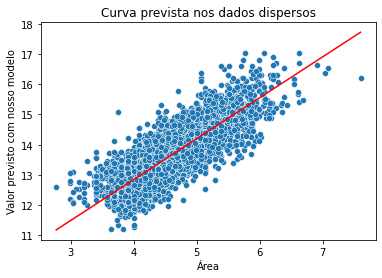

In [27]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

## Comparing with Sklearn

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(np.array(area).reshape(len(area),1), valor)

LinearRegression()

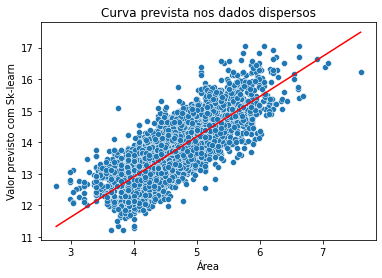

In [30]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = lr.predict(np.array(area).reshape(len(area),1)), color='red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com Sk-learn')
plt.show()

In [31]:
from sklearn.metrics import r2_score

r2_score(valor, lr.predict(np.array(area).reshape(len(area),1)))

0.6419756524871572

## Multivariable Regression

In [32]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])
dist_Praia = np.log(dados['Dist_Praia'] + 1)
dist_Farmacia = np.log(dados['Dist_Farmacia'] + 1)

valor = np.array(valor)
area = np.array(area)
dist_Praia = np.array(dist_Praia)
dist_Farmacia = np.array(dist_Farmacia)

X = np.array([area, dist_Praia, dist_Farmacia]).T
y = valor

In [33]:
def prever(theta, X):
    return np.dot(X, theta)

In [34]:
def gradienteDescendente(theta, X, y, alpha):
    previsto = prever(theta, X)
    erro = previsto - y
    
    gradiente = np.dot(X.T, erro) / (2*len(X))
    
    theta -= alpha*gradiente

In [35]:
X = np.c_[np.ones(X.shape[0]), X] 

theta = np.random.rand(X.shape[1])

for i in range(7000):
    previsto = prever(theta, X)
    custo = soma_erro_quadratico_medio(prever(theta, X), y)
    
    if i % 1000 == 0:
        print(custo)
    
    gradienteDescendente(theta, X, y, 0.1)

128.13822500994615
0.40756843430140793
0.2483954732370933
0.1921515220999922
0.17226588058115794
0.16523493397624944
0.16274900672833958


In [36]:
r_2(prever(theta, X), y)

0.8017158659592616

In [37]:
minha_area = np.log(72)
minha_dist_Praia = np.log(0.5 + 1)
minha_dist_Farmacia = np.log(0.1 + 1)

np.exp(prever(theta, [1, minha_area, minha_dist_Praia, minha_dist_Farmacia]))

831851.7751530261

## Comparing with Sklearn

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [39]:
lr.fit(X, y)

LinearRegression()

In [40]:
r2_score(y, lr.predict(X))

0.8023047600430262